In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [149]:
raw_data=pd.read_csv("Advertising.csv")
raw_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [151]:
X=raw_data[['TV','Radio']]
#X=data[['TV']]
Y=data['Sales']
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=1)
x_train_with_ones = np.append(np.ones(x_train.shape[0]).reshape(-1,1),x_train.values,axis=1)

# 用计算标准答案的 $\theta_0, \theta_1$

In [152]:
linreg=LinearRegression()
model=linreg.fit(x_train,y_train)
print model
print "intercept", linreg.intercept_
print "[TV]", linreg.coef_, type(linreg.coef_),linreg.coef_.shape

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
intercept 2.92723732027
[TV] [ 0.04660234  0.18117959] <type 'numpy.ndarray'> (2L,)


# 用不同的 $\theta_0, \theta_1$ 绘误差图

In [65]:
th_0 = np.linspace(-30, 40, 200)
th_1 = np.linspace(-0.3, 0.3, 100)
t0_line, t1_line = np.meshgrid(th_0, th_1)
thetas = np.stack((t0_line.flat,t1_line.flat), axis=1)

In [79]:
def get_error_square(theta,x,y):
    e=np.dot(x,theta)-y
    return np.sum([i**2 for i in e ])

In [80]:
J=[]
for theta in thetas:
    J.append(get_error_square(theta,x_train_with_ones,y_train) )
J=np.array(J).reshape(t0_line.shape)    
print J

[[ 1272619.2752      1263467.37101576  1254352.58710626 ...,
    186338.17504596   184498.96498561   182696.8752    ]
 [ 1245264.90622149  1236204.86523201  1227181.94451728 ...,
    177080.8554355    175333.50856991   173623.28197906]
 [ 1218221.73101928  1209253.55322457  1200322.4957046  ...,
    168134.72960135   166479.24593052   164860.88253444]
 ..., 
 [   68163.70677686    67922.53248451    67718.47846689 ...,
    737296.3953239    744367.91515544   751476.55526171]
 [   70995.13410028    70845.82300268    70733.63217983 ...,
    758224.87201537   765388.25504167   772588.7583427 ]
 [   74137.7552        74080.30729717    74059.97966908 ...,
    779464.54248315   786719.7887042    794012.1552    ]]


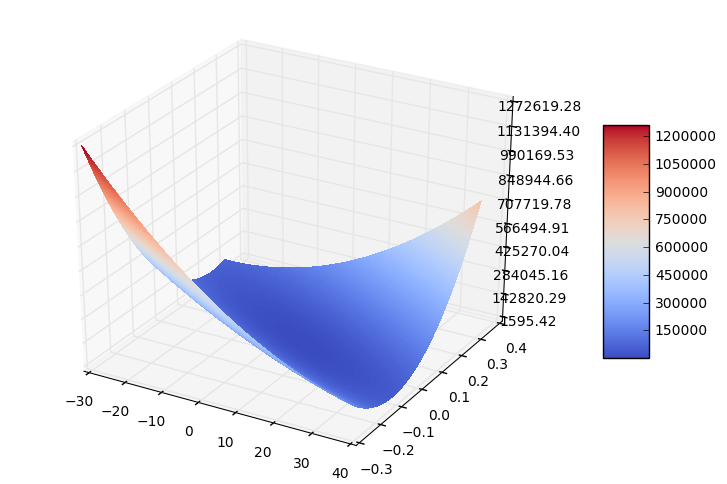

In [67]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(t0_line, t1_line, J, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(J.min(), J.max())

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# 求 $\Theta$

In [180]:
x_mean=np.average(x_train,axis=0)
x_train_bar= x_train-x_mean
y_mean = np.average(y_train)
y_train_bar=y_train- y_mean

In [191]:
def regression(data, alpha,lamda):
    n=len(data[0])-1 # 去掉y, target列
    theta= np.zeros(n)
    for times in range(500):
        for d in data:
            x = d[:-1]
            y = d[-1]
            g = np.dot(theta, x) -y
            theta = theta -alpha * g * x + lamda * theta  
        print times, theta, get_error_square(theta,data[:,:-1],data[:,-1])
    return theta

In [99]:
data=np.append(x_train_with_ones, y_train.values.reshape(-1,1),axis=1)
regression(data, 6e-5,0) 

0 [ 6.4622915  -2.83148377] 35181655.3222
1 [ 6.84636143 -2.85097088] 35611040.9167
2 [ 7.22984966 -2.87044751] 36042857.1642
3 [ 7.61275655 -2.88989461] 36476627.1388
4 [ 7.99508296 -2.90931223] 36912339.9797
5 [ 8.37682978 -2.92870042] 37349984.8632
6 [ 8.75799789 -2.94805921] 37789551.0061
7 [ 9.13858817 -2.96738866] 38231027.6651
8 [ 9.5186015 -2.9866888] 38674404.137
9 [ 9.89803874 -3.00595969] 39119669.7586
10 [ 10.27690077  -3.02520136] 39566813.9063
11 [ 10.65518846  -3.04441386] 40015825.9961
12 [ 11.03290269  -3.06359724] 40466695.4836
13 [ 11.41004432  -3.08275154] 40919411.8637
14 [ 11.78661423  -3.1018768 ] 41373964.6705
15 [ 12.16261327  -3.12097307] 41830343.4772
16 [ 12.53804231  -3.14004038] 42288537.8959
17 [ 12.91290222  -3.1590788 ] 42748537.5776
18 [ 13.28719386  -3.17808835] 43210332.2121
19 [ 13.66091809  -3.19706908] 43673911.5275
20 [ 14.03407577  -3.21602104] 44139265.2907
21 [ 14.40666777  -3.23494427] 44606383.3067
22 [ 14.77869493  -3.25383881] 45075255.418

array([ 41.79440137,  -4.6259145 ])

In [192]:
data=np.append(x_train_bar, y_train_bar.values.reshape(-1,1),axis=1)
regression(data, 4.5e-5,0)

0 [ 0.04563599  0.14478699] 510.832941638
1 [ 0.04805829  0.17299732] 468.187553914
2 [ 0.0485448   0.17866322] 468.120948705
3 [ 0.04864251  0.17980119] 468.450390562
4 [ 0.04866213  0.18002975] 468.530386225
5 [ 0.04866607  0.18007565] 468.547010799
6 [ 0.04866687  0.18008487] 468.550372265
7 [ 0.04866702  0.18008672] 468.551048307
8 [ 0.04866706  0.18008709] 468.551184123
9 [ 0.04866706  0.18008717] 468.551211403
10 [ 0.04866706  0.18008718] 468.551216882
11 [ 0.04866706  0.18008719] 468.551217982
12 [ 0.04866706  0.18008719] 468.551218203
13 [ 0.04866706  0.18008719] 468.551218247
14 [ 0.04866706  0.18008719] 468.551218256
15 [ 0.04866706  0.18008719] 468.551218258
16 [ 0.04866706  0.18008719] 468.551218258
17 [ 0.04866706  0.18008719] 468.551218259
18 [ 0.04866706  0.18008719] 468.551218259
19 [ 0.04866706  0.18008719] 468.551218259
20 [ 0.04866706  0.18008719] 468.551218259
21 [ 0.04866706  0.18008719] 468.551218259
22 [ 0.04866706  0.18008719] 468.551218259
23 [ 0.04866706  0.18

array([ 0.04866706,  0.18008719])

In [182]:
def regression3(x,y,alpha):
    n,p =x.shape   
    theta = np.zeros(p)
    for times in range(500):
        t_bar=[]
        for j in range(p): #求每一个thta
            g=0.0
            for i in range(n):
                g += (np.dot(theta,x[i])-y[i])*x[i][j]                
            g = g/n
            t_bar.append(theta[j] - alpha * g)
        theta=t_bar
        print theta
    return theta

In [102]:
regression3(x_train_with_ones,y_train.values,6e-6)

[6.0000468639999998, 0.0089242959999999965]
[6.0000860366891287, 0.016336374176557769]
[6.0001188213549526, 0.022492478924136562]
[6.0001463004437481, 0.027605434179726211]
[6.0001693729819259, 0.031852000993068813]
[6.000188785656416, 0.035378988361065046]
[6.0002051586285008, 0.038308328584990725]
[6.0002190069735075, 0.040741292611506379]
[6.0002307584875627, 0.04276199108668538]
[6.0002407684769974, 0.044440282158557026]
[6.0002493320417001, 0.045834186554269546]
[6.0002566942770619, 0.046991893423890256]
[6.0002630587472083, 0.047953426295188437]
[6.0002685945224474, 0.048752026733389041]
[6.0002734420242252, 0.049415303540619036]
[6.0002777178796594, 0.049966187224203429]
[6.0002815189534724, 0.05042372273088655]
[6.000284925696719, 0.050803727852719527]
[6.0002880049280716, 0.051119340066468878]
[6.0002908121438177, 0.051381470711418402]
[6.0002933934364338, 0.051599182207017598]
[6.0002957870880538, 0.051780001351227997]
[6.0002980248939268, 0.051930179530654375]
[6.00030013326

[6.000415255523448, 0.05266573199675869]

In [183]:
regression3(x_train_bar.values,y_train_bar.values,2.5e-4)

[0.091375040888888898, 0.011060884222222225]
[0.0087451941852561138, 0.020119853128090701]
[0.083181179230216881, 0.029898936304643256]
[0.015857690322015033, 0.038003254810643955]
[0.07649430806911009, 0.046652916940783662]
[0.021641389144699562, 0.053899200257433381]
[0.071036431953726109, 0.061553026039840225]
[0.026343726196486526, 0.068028889009589075]
[0.06658093063482616, 0.074804103762715374]
[0.030166151982465049, 0.080588841428371763]
[0.062943054241308236, 0.086588411714703051]
[0.033272668200984838, 0.091753663251570639]
[0.059972178079035418, 0.097068111464918491]
[0.035796780486846036, 0.10167849841934633]
[0.057545491166562525, 0.10638747289372083]
[0.037847161285058384, 0.11050120569539863]
[0.055562852990528322, 0.11467484146212266]
[0.039512262043026186, 0.11834429049230678]
[0.053942602147919363, 0.12204439043128916]
[0.040864069567015111, 0.1253166196823029]
[0.052618140614514336, 0.12859768130460358]
[0.041961165265802451, 0.13151494397622557]
[0.051535150026972891

[0.046602340710768818, 0.1811795920310976]

In [142]:
def regression2(x,y,alpha):
    n,p =x.shape   
    theta = np.zeros(p)
    for times in range(100):
        t_bar=[]
        m1=map(lambda x_i, y_i: np.dot(theta,x_i)- y_i, x,y )        
        for j in range(p): #求每一个thta
            g=0.0
            for i in range(n):
                g +=m1[i]*x[i][j]
            g = g/n
            t_bar.append(theta[j] - alpha * g)
        theta=t_bar
        print theta
    return theta

In [106]:
regression2(x_train_with_ones,y_train.values,6e-6)

[6.0000468639999998, 0.0089242959999999965]
[6.0000860366891287, 0.016336374176557769]
[6.0001188213549526, 0.022492478924136562]
[6.0001463004437481, 0.027605434179726211]
[6.0001693729819259, 0.031852000993068813]
[6.000188785656416, 0.035378988361065046]
[6.0002051586285008, 0.038308328584990725]
[6.0002190069735075, 0.040741292611506379]
[6.0002307584875627, 0.04276199108668538]
[6.0002407684769974, 0.044440282158557026]
[6.0002493320417001, 0.045834186554269546]
[6.0002566942770619, 0.046991893423890256]
[6.0002630587472083, 0.047953426295188437]
[6.0002685945224474, 0.048752026733389041]
[6.0002734420242252, 0.049415303540619036]
[6.0002777178796594, 0.049966187224203429]
[6.0002815189534724, 0.05042372273088655]
[6.000284925696719, 0.050803727852719527]
[6.0002880049280716, 0.051119340066468878]
[6.0002908121438177, 0.051381470711418402]
[6.0002933934364338, 0.051599182207017598]
[6.0002957870880538, 0.051780001351227997]
[6.0002980248939268, 0.051930179530654375]
[6.00030013326

[6.000415255523448, 0.05266573199675869]

In [143]:
regression2(x_train_bar.values,y_train_bar.values,1e-4)

[0.036550016355555555]
[0.045285770955832333]
[0.047373688172992687]
[0.047872717564864165]
[0.047991989694958631]
[0.048020496715284466]
[0.048027310127665167]
[0.048028938589277037]
[0.048029327804999376]
[0.048029420830759027]
[0.048029443064680891]
[0.048029448378771135]
[0.048029449648882422]
[0.048029449952449468]
[0.048029450025004486]
[0.048029450042345732]
[0.048029450046490438]
[0.048029450047481055]
[0.048029450047717817]
[0.048029450047774411]
[0.048029450047787935]
[0.048029450047791168]
[0.048029450047791938]
[0.048029450047792126]
[0.048029450047792167]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.048029450047792181]
[0.04802945

[0.048029450047792181]

In [189]:
#x, y 是 np.ndarray
def regression1(x,y, alpha):
    n,p =x.shape   
    theta = np.zeros(p)
    for times in range(500):
        m1=map(lambda x_i, y_i: np.dot(theta,x_i)- y_i, x,y ) #得到数组 [theta*x[1]-y[1], theta*x[2]- y[2], ..., theta * x[n]-yn], 1维 长度为n
        m2=[np.dot(m1, x_t)/n for x_t in x.T]  # x_t 是 x.T 的每一行，也就是原来x 的每一列，np.dot(m1, x_t) 就是 [attach]4776[/attach]
        theta = theta-[alpha *m for m in m2]
        print times, theta,get_error_square(theta,x,y)
    return theta

In [108]:
regression1(x_train_with_ones,y_train.values,6e-6)

0 [ 6.0070296  1.3386444]
1 [  5.84100471 -31.34761223]
2 [   9.90052085  766.76606143]
3 [   -89.2167289  -18721.10209923]
4 [   2330.97532945  457122.14855793]
5 [   -56763.83880941 -11161737.20247354]
6 [  1.38617842e+06   2.72540706e+08]
7 [ -3.38467332e+07  -6.65473792e+09]
8 [  8.26449686e+08   1.62491459e+11]
9 [ -2.01797600e+10  -3.96762044e+12]
10 [  4.92737457e+11   9.68790116e+13]
11 [ -1.20313721e+13  -2.36553447e+15]
12 [  2.93774935e+14   5.77602229e+16]
13 [ -7.17322280e+15  -1.41035500e+18]
14 [  1.75151516e+17   3.44372150e+19]
15 [ -4.27674623e+18  -8.40867570e+20]
16 [  1.04427063e+20   2.05318075e+22]
17 [ -2.54983832e+21  -5.01333545e+23]
18 [  6.22604455e+22   1.22412663e+25]
19 [ -1.52023877e+24  -2.98900008e+26]
20 [  3.71202922e+25   7.29836380e+27]
21 [ -9.06381362e+26  -1.78207135e+29]
22 [  2.21314846e+28   4.35135653e+30]
23 [ -5.40393514e+29  -1.06248853e+32]
24 [  1.31950096e+31   2.59432172e+33]
25 [ -3.22187947e+32  -6.33466148e+34]
26 [  7.86699494e+33

array([ -1.57716914e+135,  -3.10093307e+137])

In [190]:
regression1(x_train_bar.values,y_train_bar.values,2.5e-4)

0 [ 0.09137504  0.01106088] 3608.08142797
1 [ 0.00874519  0.02011985] 3099.45491147
2 [ 0.08318118  0.02989894] 2676.86955431
3 [ 0.01585769  0.03800325] 2325.29169925
4 [ 0.07649431  0.04665292] 2032.37260403
5 [ 0.02164139  0.0538992 ] 1787.96209521
6 [ 0.07103643  0.06155303] 1583.71110558
7 [ 0.02634373  0.06802889] 1412.7467618
8 [ 0.06658093  0.0748041 ] 1269.40670016
9 [ 0.03016615  0.08058884] 1149.02174393
10 [ 0.06294305  0.08658841] 1047.7380769
11 [ 0.03327267  0.09175366] 962.371680189
12 [ 0.05997218  0.09706811] 890.289130128
13 [ 0.03579678  0.1016785 ] 829.30994015
14 [ 0.05754549  0.10638747] 777.626514877
15 [ 0.03784716  0.11050121] 733.738506429
16 [ 0.05556285  0.11467484] 696.39895188
17 [ 0.03951226  0.11834429] 664.570051185
18 [ 0.0539426   0.12204439] 637.386836902
19 [ 0.04086407  0.12531662] 614.12730686
20 [ 0.05261814  0.12859768] 594.187852008
21 [ 0.04196117  0.13151494] 577.063024751
22 [ 0.05153515  0.13442505] 562.328867049
23 [ 0.04285122  0.1370252

array([ 0.04660234,  0.18117959])